In [173]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import graphviz

In [174]:
df = pd.read_csv("zoo_data.csv", header=None)

In [175]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [176]:
clf1 = DecisionTreeClassifier()

In [177]:
X = df.iloc[:,:16]
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0


In [178]:
y = df.iloc[:, 16]
y

0      1
1      1
2      4
3      1
4      1
5      1
6      1
7      4
8      4
9      1
10     1
11     2
12     4
13     7
14     7
15     7
16     2
17     1
18     4
19     1
20     2
21     2
22     1
23     2
24     6
25     5
26     5
27     1
28     1
29     1
      ..
71     2
72     7
73     4
74     1
75     1
76     3
77     7
78     2
79     2
80     3
81     7
82     4
83     2
84     1
85     7
86     4
87     2
88     6
89     5
90     3
91     3
92     4
93     1
94     1
95     2
96     1
97     6
98     1
99     7
100    2
Name: 16, Length: 101, dtype: int64

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [180]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [181]:
y1_pred = clf1.predict(X_test)


In [182]:
print("using gini:", metrics.accuracy_score(y_test, y1_pred))

using gini: 0.9047619047619048


In [183]:

clf2 = DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_train, y_train)
y2_pred = clf2.predict(X_test)
print("using entropy:", metrics.accuracy_score(y_test, y2_pred))

using entropy: 0.9047619047619048


In [184]:
dot_data = tree.export_graphviz(clf1)

In [185]:
graph1 = graphviz.Source(dot_data, format="png") 

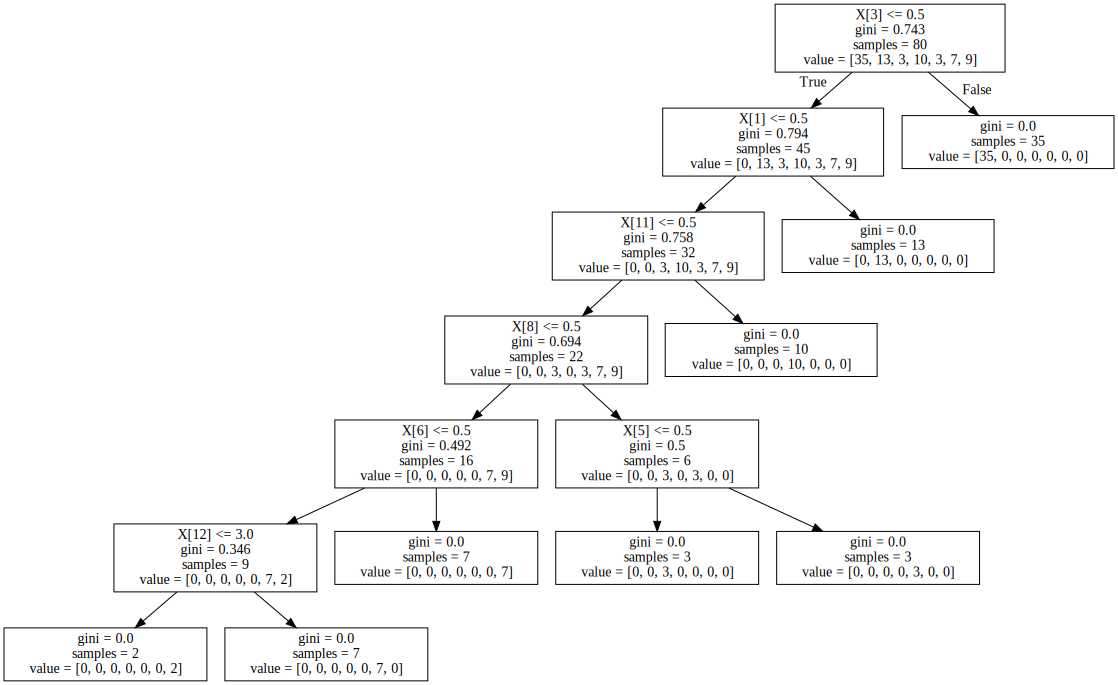

In [186]:
graph1

In [196]:
dot_data2 = tree.export_graphviz(clf2)

In [193]:
graph2 = graphviz.Source(dot_data2, format="png")

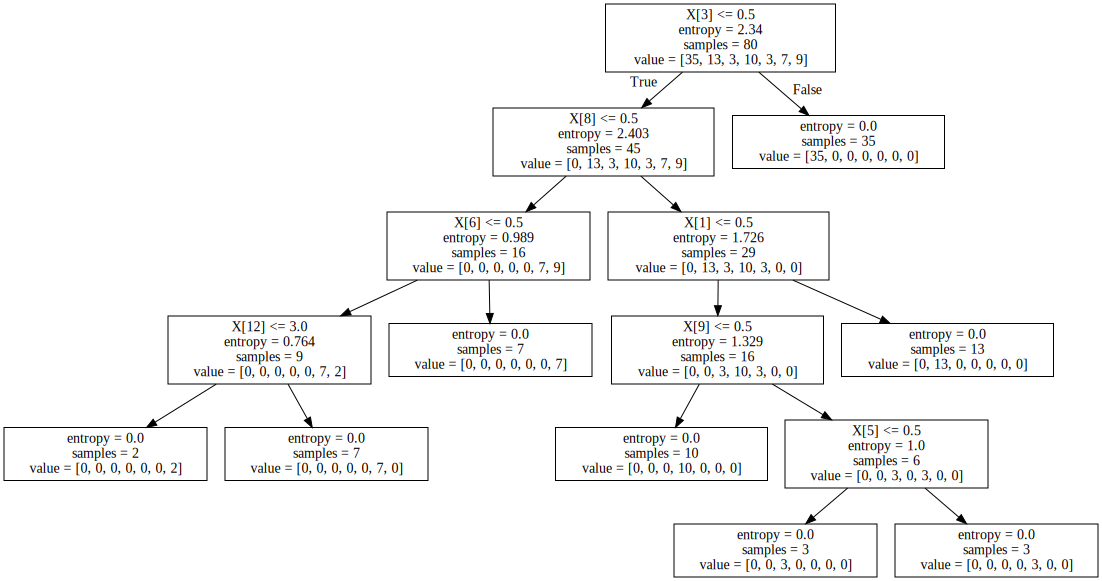

In [194]:
graph2